In [1]:
from bioblend.galaxy import GalaxyInstance
import pandas as pd
from io import StringIO
import os
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Add galaxy API key
Add `GALAXY_API_KEY` from `https://usegalaxy.eu/user/api_key` via `export GALAXY_API_KEY="<key>"` or `%env  GALAXY_API_KEY=<key>` in jupyter

In [2]:
%env GALAXY_API_KEY=

env: GALAXY_API_KEY=88c98d1c08f608ace9cbf5fd766eda96


In [3]:
history_id = "737d864aaf9b7c41"
collection_name = "VFs"

gi = GalaxyInstance(url='https://usegalaxy.eu/', key=os.environ['GALAXY_API_KEY'])

datasets = gi.datasets.get_datasets(name = collection_name, history_id = history_id)

#print(datasets)

#fetch collection by name
if len(datasets) > 1:
    print("too many datasets with that name")

for dataset in datasets:
    if dataset['history_content_type']=='dataset_collection': #get only collections
        if dataset['job_state_summary']['all_jobs'] == dataset['job_state_summary']['ok']: #get only collections where all jobs are ok
            dataset_collection_id = dataset["id"]


# get data of the elements in the collection
collection = gi.dataset_collections.show_dataset_collection(dataset_collection_id = dataset_collection_id)




too many datasets with that name


In [4]:
dfs = []

for element in collection['elements']:

    element_name = element['element_identifier']

    print(element_name)

    element_id = element['object']['id']
    data = gi.datasets.download_dataset(element_id, maxwait = 3)
    df = pd.read_csv(StringIO(data.decode("utf-8")), sep="\t")

    dfs.append(df)

    # # get only species
    # df = df.loc[(df.iloc[:,3] == "S")]

    # #set taxa as index without space
    # df.index = df.iloc[:,5].str.replace(" ","")

    # # get only abundance for the sample
    # df = df.iloc[:,0]

    # df.name = element_name

    # dfs.append(df)


split_file_000000.txt
split_file_000001.txt
split_file_000002.txt
split_file_000003.txt
split_file_000004.txt
split_file_000005.txt
split_file_000006.txt
split_file_000007.txt
split_file_000008.txt
split_file_000009.txt
split_file_000010.txt
split_file_000011.txt
split_file_000012.txt
split_file_000013.txt
split_file_000014.txt
split_file_000015.txt
split_file_000016.txt
split_file_000017.txt
split_file_000018.txt
split_file_000019.txt
split_file_000020.txt
split_file_000021.txt
split_file_000022.txt
split_file_000023.txt
split_file_000024.txt
split_file_000025.txt
split_file_000026.txt
split_file_000027.txt
split_file_000028.txt
split_file_000029.txt
split_file_000030.txt
split_file_000031.txt
split_file_000032.txt
split_file_000033.txt
split_file_000034.txt
split_file_000035.txt
split_file_000036.txt
split_file_000037.txt
split_file_000038.txt
split_file_000039.txt
split_file_000040.txt
split_file_000041.txt
split_file_000042.txt
split_file_000043.txt
split_file_000044.txt
split_file

In [5]:
main_df = pd.concat(dfs, join="outer", axis = 0)

outpath = "data/output"
os.makedirs(outpath, exist_ok=True)

main_df.to_csv(os.path.join(outpath,"palestine_VFs_v1.csv"))

In [6]:
pd.set_option('display.max_colwidth', None)

main_df["Strain"] = main_df["PRODUCT"].str.extract(r'.*\[([^\]]+)\]')
main_df.set_index("ACCESSION", inplace=True)

print(main_df.to_string())

               SampleID             SEQUENCE    START      END STRAND       GENE       COVERAGE     COVERAGE_MAP   GAPS  %COVERAGE  %IDENTITY DATABASE                                                                                                                                                                                                                                PRODUCT  RESISTANCE                                                            Strain
ACCESSION                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
NP_462663     barcode01   barcode01_contig_1   934349   935044      +       mgtC

In [7]:
palestineVFs = pd.read_csv('data/PalestineVFheatmapSampleNo.csv')

accession_mapping = {}
for index, row in main_df.iterrows():
    accession_mapping[index] = row["Strain"]

def change_accession_with_strain(val):
    return(accession_mapping[val])

palestineVFs.index = palestineVFs["VF Accession ID"].apply(change_accession_with_strain)

palestineVFs.index.name = "Strain"
del palestineVFs["VF Accession ID"]
palestineVFs


,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10,...,S75,S76,S77,S78,S79,S80,S81,S82,S83,S84
Strain,,,,,,,,,,,,,,,,,,,,,
Escherichia coli O18:K1:H7 str. RS218,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Salmonella enterica (serovar typhimurium),1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
Salmonella enterica subsp. enterica serovar Typhimurium str. LT2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Campylobacter jejuni subsp. jejuni NCTC 11168,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Campylobacter jejuni subsp. jejuni NCTC 11168,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Campylobacter jejuni subsp. jejuni NCTC 11168,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Campylobacter jejuni subsp. jejuni NCTC 11168,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Campylobacter jejuni subsp. jejuni NCTC 11168,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [13]:
result = palestineVFs.transpose()


/home/nasr/miniconda3/envs/jupyterlab/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/nasr/miniconda3/envs/jupyterlab/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


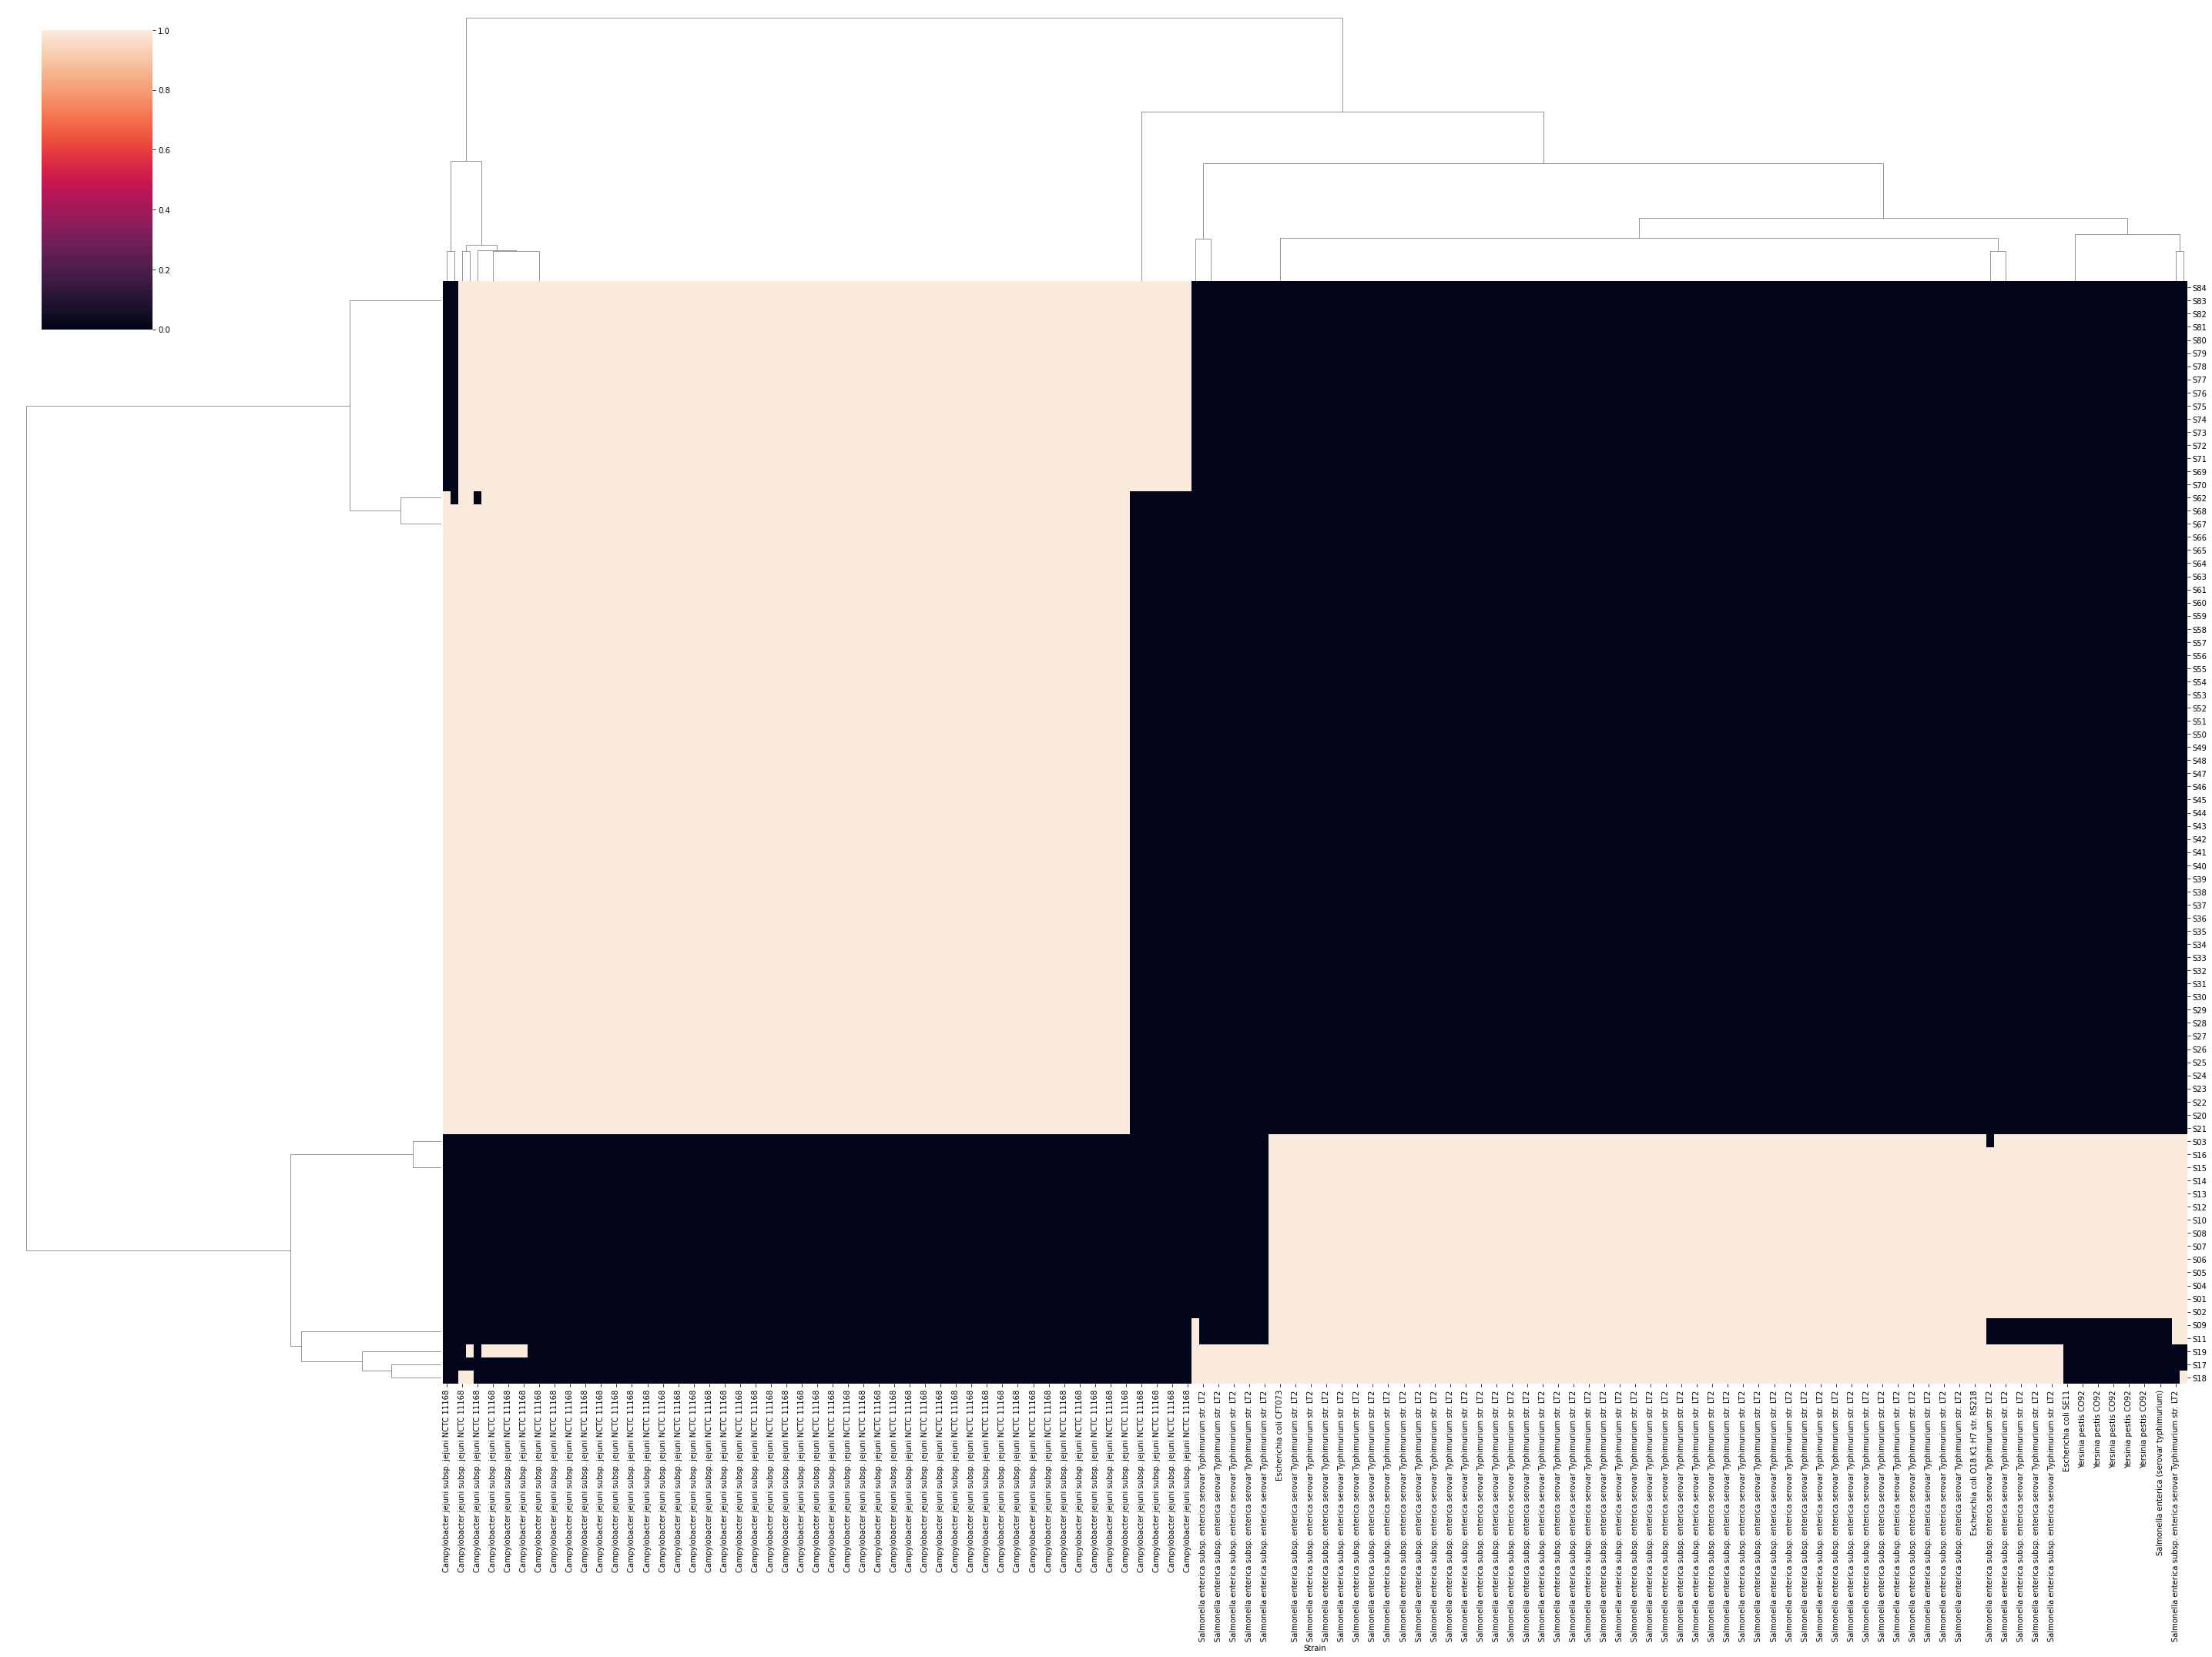

In [9]:
#sns.set(font_scale=1)


#g = sns.clustermap(result, cmap="Reds", xticklabels=True, row_cluster=False, figsize=(35,15), cbar_pos=(0.75, 0.04, 0.05, 0.10), linewidths=2)
g = sns.clustermap(result,figsize=(40, 30), yticklabels=True)

ax = g.ax_heatmap
ax.set_ylabel("")

# fig = g.get_figure()
plt.savefig(os.path.join(outpath, "clustermap_VF_strain_per_samples_palestine.svg"))
plt.savefig(os.path.join(outpath, "clustermap_VF_strain_per_samples_palestine.pdf"))
plt.savefig(os.path.join(outpath, "clustermap_VF_strain_per_samples_palestine.png"))

## Palestine Metadata

In [14]:
palestine_meta_df = pd.read_excel(open('data/FoodbornePathogenDetectionDataAnalysis.xlsx', 'rb'), sheet_name='Palestine') 
palestine_meta_df.set_index("Galaxy ID", inplace=True)
palestine_meta_df.index.name = "Name"

print(palestine_meta_df.to_string())

          Barcode Name Sample  Barcode No.        ID Data Sequencing Source  Sequencing Date           Information         Medium  Galaxy Analysis Date  History Link  Comments
Name                                                                                                                                                                           
barcode01    barcode01    S01            1      S231             Palestine              2021   Salmonella enterica  Chicken Stool                   NaN           NaN       NaN
barcode02    barcode02    S02            2      S239             Palestine              2021   Salmonella enterica  Chicken Stool                   NaN           NaN       NaN
barcode03    barcode03    S03            3  SF2707-H             Palestine              2021   Salmonella enterica  Chicken Stool                   NaN           NaN       NaN
barcode04    barcode04    S04            4  SF2710-H             Palestine              2021   Salmonella enterica  Chic

In [15]:
sample_no = {}
for index, row in palestine_meta_df.iterrows():
    sample_no[row["Sample"]] = row["Information"]

def change_accession_with_strain(val):
    return(sample_no[val])

result.index.name = "Sample"
result["Sample"] = result.index
result.index = result["Sample"].apply(change_accession_with_strain)
del result["Sample"]

result.to_csv(os.path.join(outpath,"palestine_transpose_tabular.csv"))

In [16]:
result

Strain,Escherichia coli O18:K1:H7 str. RS218,Salmonella enterica (serovar typhimurium),Salmonella enterica subsp. enterica serovar Typhimurium str. LT2,Campylobacter jejuni subsp. jejuni NCTC 11168,Campylobacter jejuni subsp. jejuni NCTC 11168,Campylobacter jejuni subsp. jejuni NCTC 11168,Campylobacter jejuni subsp. jejuni NCTC 11168,Campylobacter jejuni subsp. jejuni NCTC 11168,Campylobacter jejuni subsp. jejuni NCTC 11168,Campylobacter jejuni subsp. jejuni NCTC 11168,...,Campylobacter jejuni subsp. jejuni NCTC 11168,Campylobacter jejuni subsp. jejuni NCTC 11168,Campylobacter jejuni subsp. jejuni NCTC 11168,Campylobacter jejuni subsp. jejuni NCTC 11168,Campylobacter jejuni subsp. jejuni NCTC 11168,Campylobacter jejuni subsp. jejuni NCTC 11168,Campylobacter jejuni subsp. jejuni NCTC 11168,Campylobacter jejuni subsp. jejuni NCTC 11168,Campylobacter jejuni subsp. jejuni NCTC 11168,Campylobacter jejuni subsp. jejuni NCTC 11168
Sample,,,,,,,,,,,,,,,,,,,,,
Salmonella enterica,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Salmonella enterica,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Salmonella enterica,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Salmonella enterica,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Salmonella enterica,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Campylobacter jejuni,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Campylobacter jejuni,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Campylobacter jejuni,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [18]:

result = result.groupby("Strain",axis=1).sum()

result

Strain,Campylobacter jejuni subsp. jejuni NCTC 11168,Escherichia coli CFT073,Escherichia coli O18:K1:H7 str. RS218,Escherichia coli SE11,Salmonella enterica (serovar typhimurium),Salmonella enterica subsp. enterica serovar Typhimurium str. LT2,Yersinia pestis CO92
Sample,,,,,,,
Salmonella enterica,0,4,1,2,1,100,11
Salmonella enterica,0,4,1,2,1,100,11
Salmonella enterica,0,4,1,2,1,99,11
Salmonella enterica,0,4,1,2,1,100,11
Salmonella enterica,0,4,1,2,1,100,11
...,...,...,...,...,...,...,...
Campylobacter jejuni,95,0,0,0,0,0,0
Campylobacter jejuni,95,0,0,0,0,0,0
Campylobacter jejuni,95,0,0,0,0,0,0


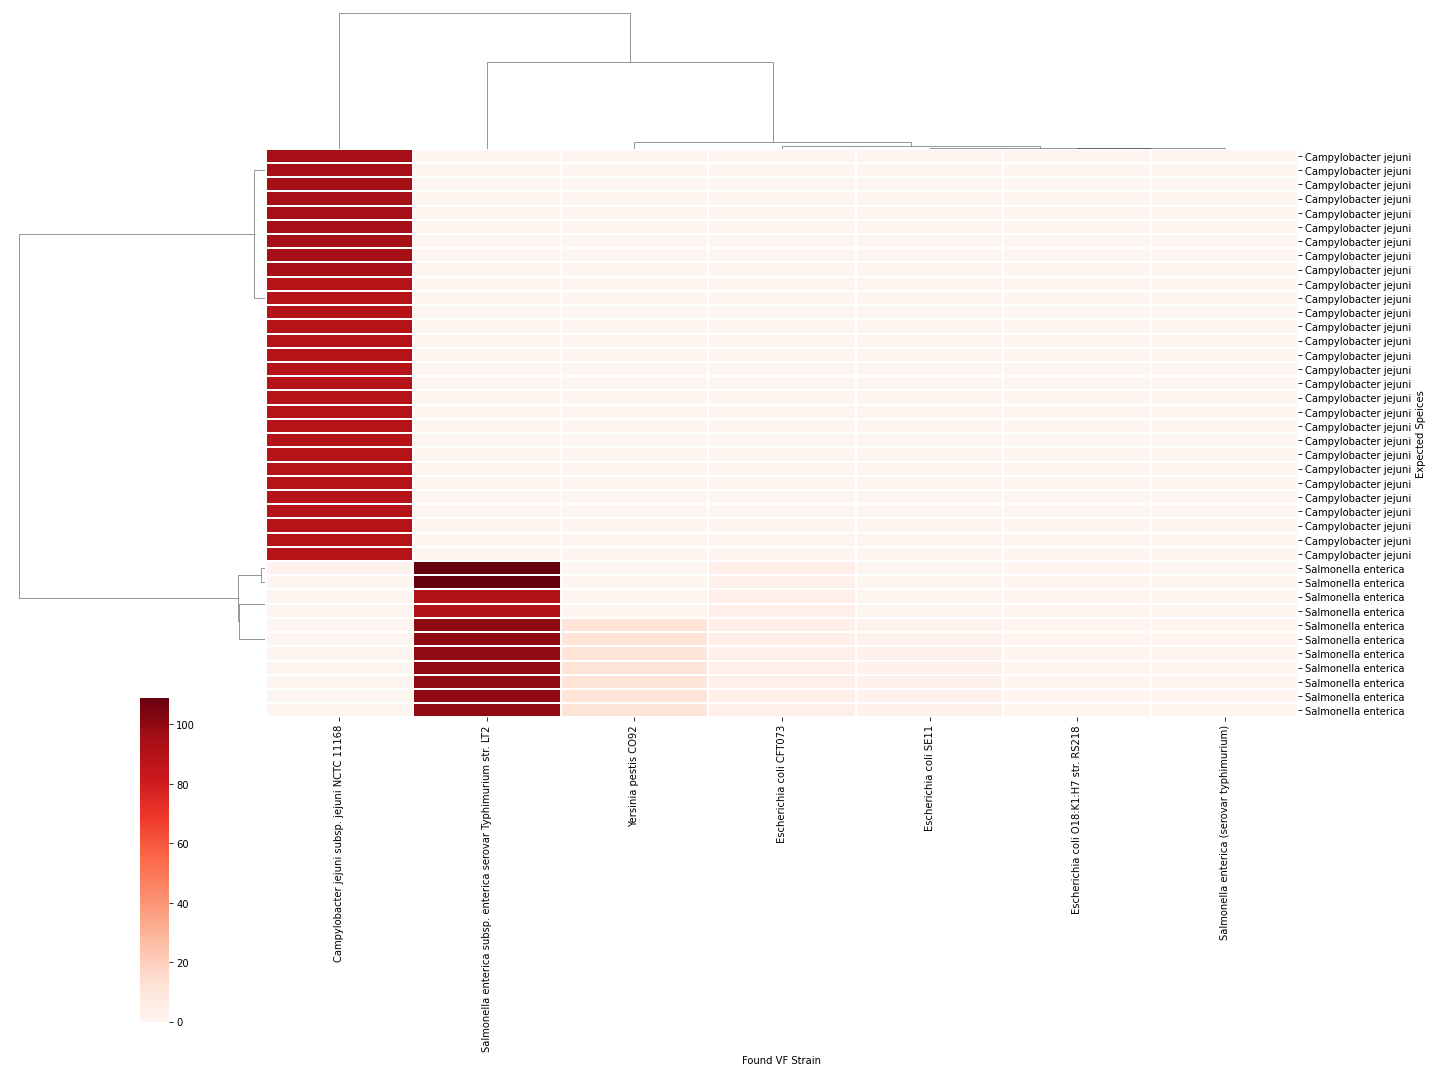

In [31]:
reduced_result = result.sample(n=40)
g = sns.clustermap(reduced_result, cmap="Reds", yticklabels=True, xticklabels=True, row_cluster=True, figsize=(20,15), cbar_pos=(0.1, .05, .02, .3), linewidths=2)
ax = g.ax_heatmap
ax.set_ylabel("Expected Speices")
ax.set_xlabel("Found VF Strain")
plt.savefig(os.path.join(outpath, "clustermap_VF_strain_per_expected_speices_palestine.svg"))
plt.savefig(os.path.join(outpath, "clustermap_VF_strain_per_expected_speices_palestine.pdf"))
plt.savefig(os.path.join(outpath, "clustermap_VF_strain_per_expected_speices_palestine.png"))
plt.show()
